In [1]:
description='''
Using the OMC as a basis cavity, project all the current actuators on the OMC contour plots:

ITMX and ITMY CO2 Thermal Lens

ITM/ETM Ring Heaters

SR3 HR Heater

SRM AR Heater

'''

In [23]:
import pykat
from pykat.ifo import aligo
import pykat.ifo.aligo.plot
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline

In [3]:
import numpy as np

### My functions
from kat_commands import *
from cav_commands import *
from MMT import modematch

import get_WS
import trace_mode

In [4]:
def try_it(kat_in):
    result = None
    tries = None
    while result is None and tries < 20:    
        try:
            out = kat_in.run()
            result = 1
        except:
            tries += 1 
            print("Ran into a pipe error, running again")
            continue

    return out

In [5]:
katfile = "aLIGO_IFO_AWC_tuning_DCoff_maxtem4_modified.kat"

In [6]:
basekat = pykat.finesse.kat() 
basekat.load(katfile)
basekat.parse(cav_commands_FC_first)
basekat.parse(commands)
basekat.parse('''
noxaxis
''')
basekat.verbose=False

In [7]:
# Get the OMC mode
kat = basekat.deepcopy()
[OMCx,OMCy] = trace_mode.from_cav_to_BS(kat,'cavOMC')

In [8]:
# Calculate SR3 curvature change
dR_SR3 = np.linspace(-0.030,0.030,10)
SRC_mode_vary_SR3 = []

for i in range(len(dR_SR3)):
    kat = basekat.deepcopy()
    kat.SR3.Rcx = basekat.SR3.Rc.value + dR_SR3[i]
    kat.SR3.Rcy = basekat.SR3.Rc.value + dR_SR3[i]
    
    [SRC_x,SRC_y] = trace_mode.from_cav_to_BS(kat,'cavOMC')
    
    SRC_mode_vary_SR3.append(SRC_x)

SRC_mode_vary_SR3 = np.array(SRC_mode_vary_SR3)

In [9]:
# Calculate SRM curvature change
dR_SRM = np.linspace(-50e-1,18e-1,10)
SRC_mode_vary_SRM = []

for i in range(len(dR_SRM)):
    kat = basekat.deepcopy()
    kat.SRMHR.Rcx = basekat.SRMHR.Rc.value + dR_SRM[i]
    kat.SRMHR.Rcy = basekat.SRMHR.Rc.value + dR_SRM[i]
    
    [SRC_x,SRC_y] = trace_mode.from_cav_to_BS(kat,'cavOMC')
    
    SRC_mode_vary_SRM.append(SRC_x)

SRC_mode_vary_SRM = np.array(SRC_mode_vary_SRM)

In [10]:
# Calculate OM1 curvature change
dR_OM1 = np.linspace(-20e-1,50e-1,20)
OMC_mode_vary_OM1 = []

for i in range(len(dR_OM1)):
    kat = basekat.deepcopy()
    kat.OM1.Rcx = basekat.OM1.Rc.value + dR_OM1[i]
    kat.OM1.Rcy = basekat.OM1.Rc.value + dR_OM1[i]

    [temp_OMC_x,temp_OMC_y] = trace_mode.from_cav_to_BS(kat,'cavOMC')
    
    OMC_mode_vary_OM1.append(temp_OMC_x)

OMC_mode_vary_OM1 = np.array(OMC_mode_vary_OM1)

In [11]:
# Calculate OM2 curvature change
dR_OM2 = np.linspace(-4e-1,4e-1,10)
OMC_mode_vary_OM2 = []

for i in range(len(dR_SRM)):
    kat = basekat.deepcopy()
    kat.OM2.Rcx = basekat.OM2.Rc.value + dR_OM2[i]
    kat.OM2.Rcy = basekat.OM2.Rc.value + dR_OM2[i]

    [temp_OMC_x,temp_OMC_y] = trace_mode.from_cav_to_BS(kat,'cavOMC')
    
    OMC_mode_vary_OM2.append(temp_OMC_x)

OMC_mode_vary_OM2 = np.array(OMC_mode_vary_OM2)

In [49]:
# Calculate OM3 curvature change
dR_OM3 = np.linspace(5e0,5e1,10)
OMC_mode_vary_OM3 = []

for i in range(len(dR_SRM)):
    kat = basekat.deepcopy()
    kat.OM3.Rcx = dR_OM3[i]
    kat.OM3.Rcy = dR_OM3[i]

    [temp_OMC_x,temp_OMC_y] = trace_mode.from_cav_to_BS(kat,'cavOMC')
    
    OMC_mode_vary_OM3.append(temp_OMC_x)
    
for i in range(len(dR_SRM)):
    kat = basekat.deepcopy()
    kat.OM3.Rcx = -dR_OM3[i]
    kat.OM3.Rcy = -dR_OM3[i]

    [temp_OMC_x,temp_OMC_y] = trace_mode.from_cav_to_BS(kat,'cavOMC')
    
    OMC_mode_vary_OM3.append(temp_OMC_x)

OMC_mode_vary_OM3 = np.array(OMC_mode_vary_OM3)

In [13]:
def make_contours(q):
    x = np.linspace(-120, 120, 100)
    y = np.linspace(-15, 15, 100)
    z_list = []
    zr_list = []

    for i in range(len(x)):
        z_list.append(q+x[i])
        zr_list.append(q+x[i]*1j)


    X, Y = np.meshgrid(z_list, zr_list)

    Z = pykat.BeamParam.overlap(X,Y)
    
    return X,Y,Z

X,Y,Z = make_contours(OMCx)

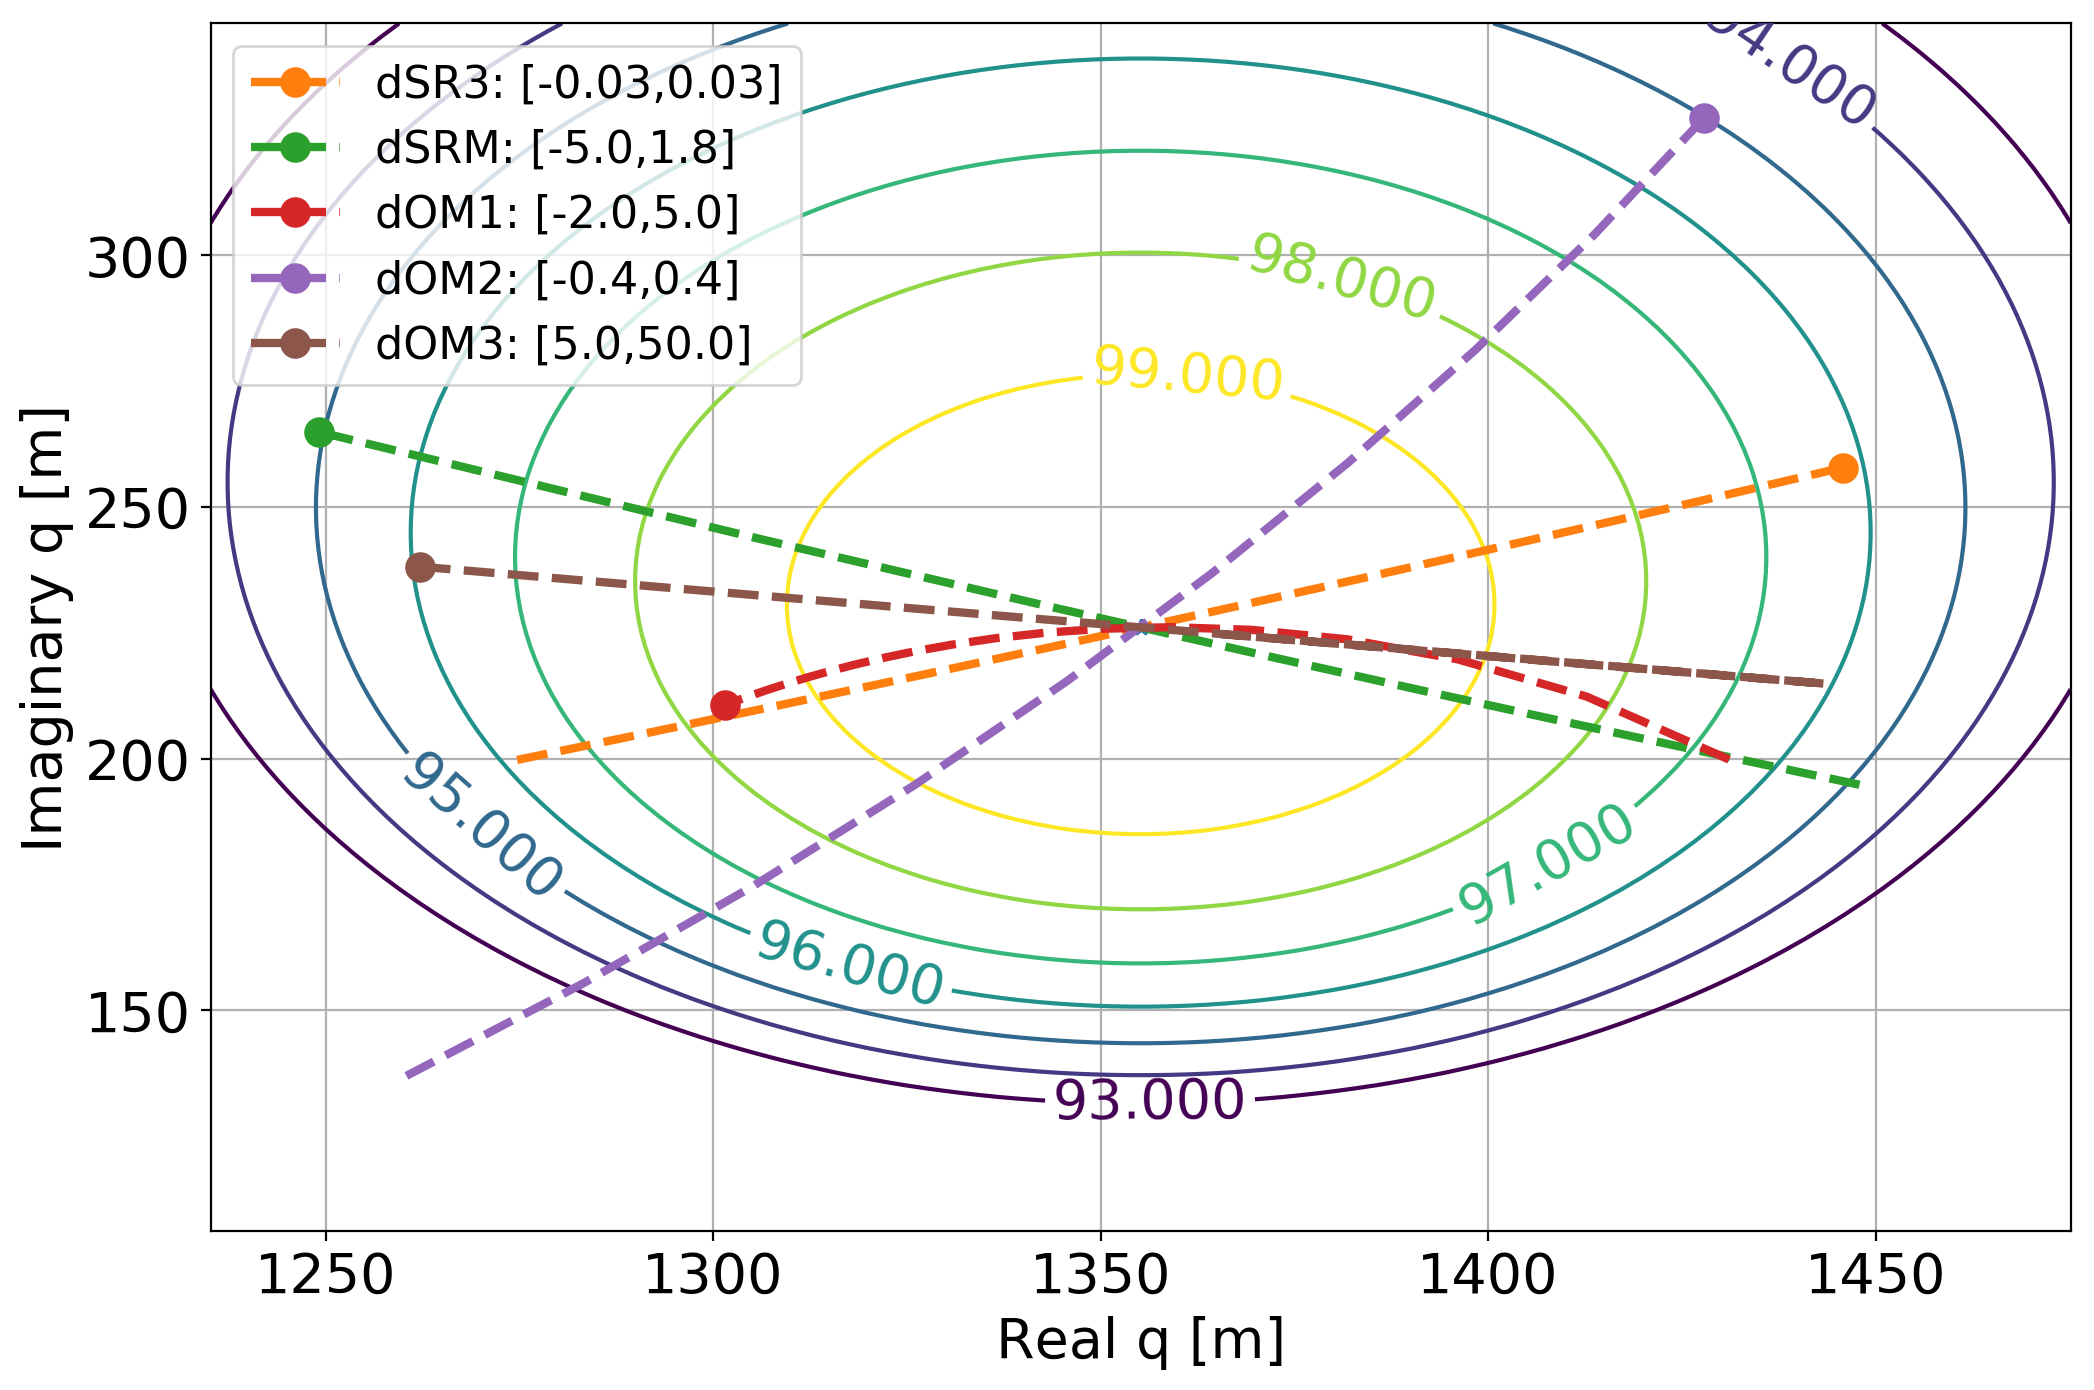

In [57]:
#### Plot
plt.figure(figsize=(12, 8), dpi=200)
ax = plt.axes()

CS = plt.contour(np.real(X),np.imag(Y),Z*100, levels=np.linspace(93,100,8))

plt.plot(np.real(OMCx),np.imag(OMCx), '*',linewidth=1)

plt.plot(np.real(SRC_mode_vary_SR3),np.imag(SRC_mode_vary_SR3),
         'o', ls='--', ms=10, markevery=[-1],linewidth=3, 
         label='dSR3: ['+str(dR_SR3[0])+','+str(dR_SR3[-1])+']')

plt.plot(np.real(SRC_mode_vary_SRM),np.imag(SRC_mode_vary_SRM),
         'o', ls='--', ms=10, markevery=[-1],linewidth=3, 
         label='dSRM: ['+str(dR_SRM[0])+','+str(dR_SRM[-1])+']')

plt.plot(np.real(OMC_mode_vary_OM1),np.imag(OMC_mode_vary_OM1),
         'o', ls='--', ms=10, markevery=[-1],linewidth=3,
         label='dOM1: ['+str(dR_OM1[0])+','+str(dR_OM1[-1])+']')

plt.plot(np.real(OMC_mode_vary_OM2),np.imag(OMC_mode_vary_OM2),
         'o', ls='--', ms=10, markevery=[-1],linewidth=3,
         label='dOM2: ['+str(dR_OM2[0])+','+str(dR_OM2[-1])+']')

plt.plot(np.real(OMC_mode_vary_OM3),np.imag(OMC_mode_vary_OM3),
         'o', ls='--', ms=10, markevery=[0],linewidth=3,
         label='dOM3: ['+str(dR_OM3[0])+','+str(dR_OM3[-1])+']')


plt.clabel(CS, inline=1, fontsize=20)
plt.legend(loc=2,fontsize=16)
plt.tick_params(labelsize=20)

plt.xlabel("Real q [m]",fontsize=20)
plt.ylabel("Imaginary q [m]" ,fontsize=20)
plt.grid()

plt.savefig('../../Figures/OutputAct_Gouyphase.png')